In [1]:
import pandas as pan
housing = pan.read_csv('housing.csv')

In [2]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

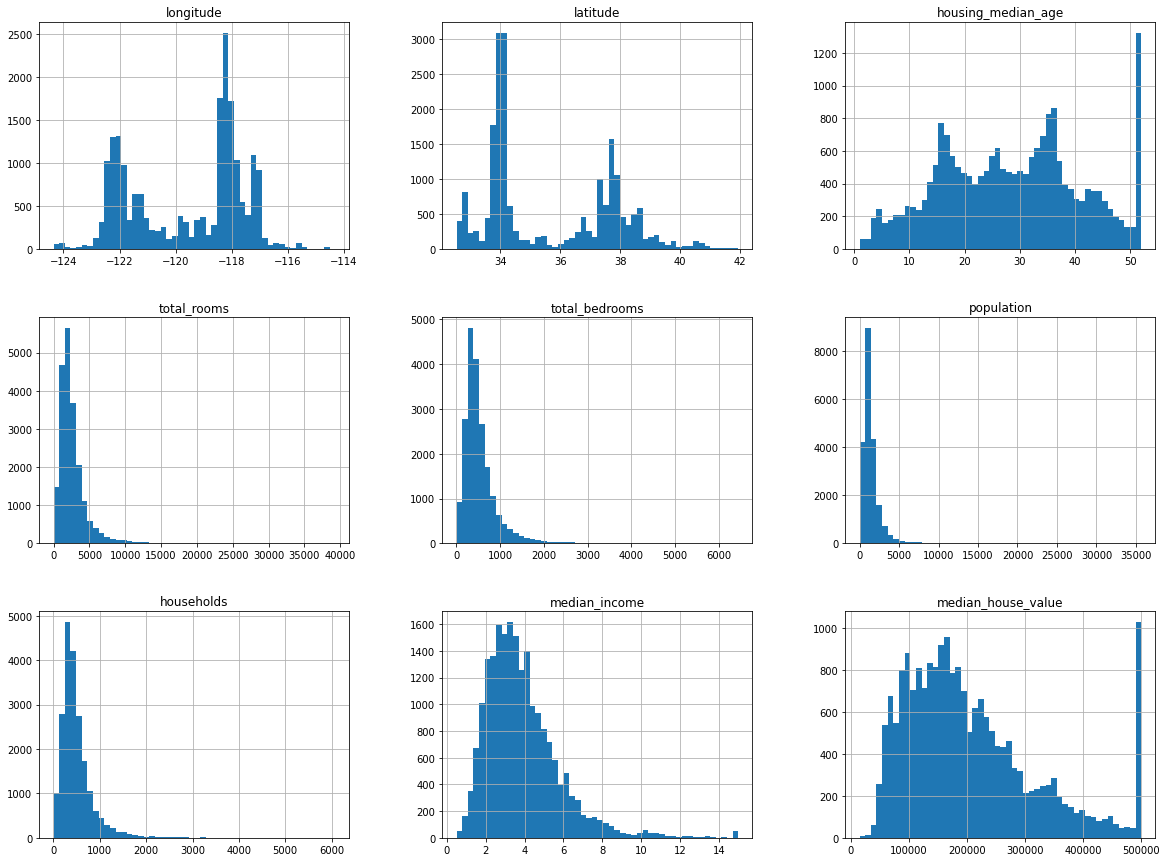

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize = (20,15))

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2,random_state=42)

In [7]:
import numpy as np
housing['income_category'] = pan.cut(housing['median_income'],bins = [0.,1.5,3.0,4.5,6.,np.inf],labels = [1,2,3,4,5])

In [8]:
housing['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

<AxesSubplot:>

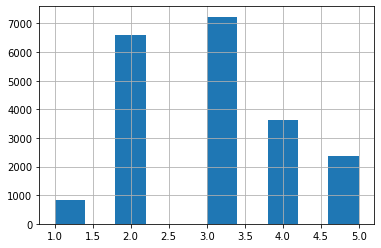

In [9]:
housing['income_category'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state = 42)
for train_index,test_index in split.split(housing,housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.[test_index]

In [11]:
strat_test_set['income_category'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [12]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_category',axis = 1,inplace = True)

In [13]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

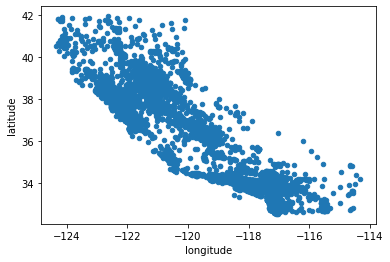

In [14]:
housing.plot(kind = 'scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

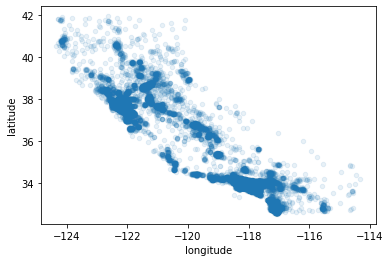

In [15]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.1)

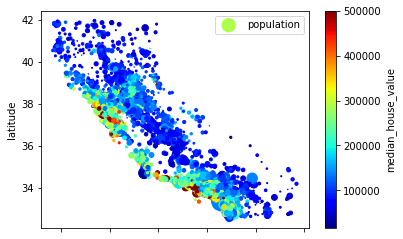

In [16]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',s = housing['population']/100,label = 'population',c = 'median_house_value'
            ,cmap = plt.get_cmap('jet'),colorbar = True)
plt.legend()

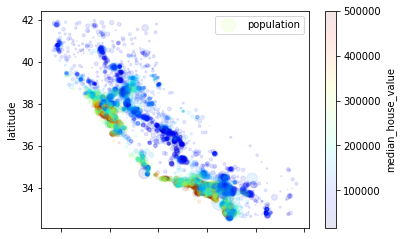

In [17]:
housing.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.1,s = housing['population']/100,label = 'population',c = 'median_house_value'
            ,cmap = plt.get_cmap('jet'),colorbar = True)
plt.legend()

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

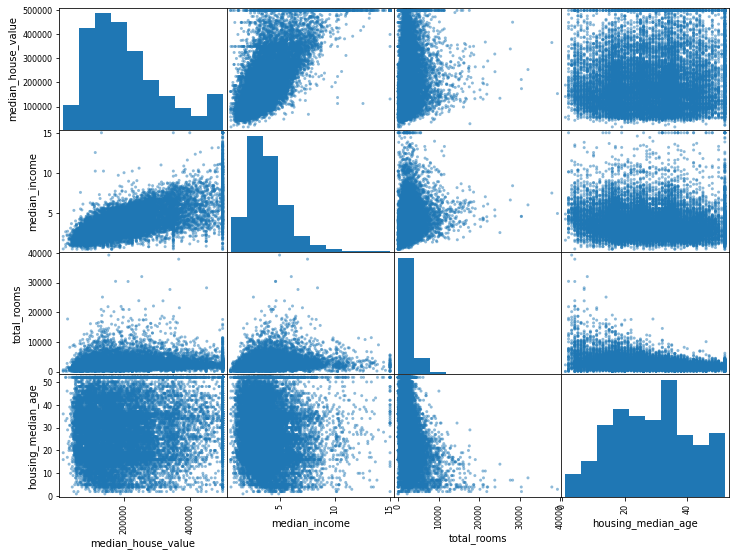

In [20]:
from pandas.plotting import scatter_matrix
Main_attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[Main_attributes],figsize=(12,9))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

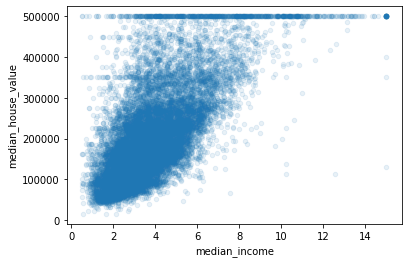

In [21]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [22]:
# s. For example, the
# total number of rooms in a district is not very useful if you don’t know how many
# households there are. What you really want is the number of rooms per household.
# Similarly, the total number of bedrooms by itself is not very useful: you probably
# want to compare it to the number of rooms. And the population per household also
# seems like an interesting attribute combination to look at. Let’s create these new
# attributes:
housing['rooms_per_housholds'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_housholds         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
housing = strat_train_set.drop('median_house_value',axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_notOP = housing.drop('ocean_proximity',axis = 1)
imputer.fit(housing_notOP)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
# housing_cat = housing['ocean_proximity']  pandas series
housing_cat = housing[['ocean_proximity']] # pandas dataframe

In [29]:
type(housing_cat)

pandas.core.frame.DataFrame

In [30]:
# let’s convert these categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

In [31]:
housing_cat_encoded = OE.fit_transform(housing_cat)

In [32]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [33]:
OE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
housing_cat_encoded_1hot = OHE.fit_transform(housing_cat)

In [35]:
housing_cat_encoded_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
# ******************************************************
# custom transformers
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
 bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

in ML we apply set of transformations on the data we can do that in sorted way just by making a pipeline which offers that set of transformations which saves space and time

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),
                        ('addrtibs_adder',CombinedAttributesAdder()),
                        ('std_scalar',StandardScaler())])
housing_notOP_transformed = num_pipeline.fit_transform(housing_notOP)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method).

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

In [38]:
from sklearn.compose import ColumnTransformer
num_attr = list(housing_notOP)
cat_attr = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attr),
    ('cat',OneHotEncoder(),cat_attr)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
print(type(housing))

<class 'pandas.core.frame.DataFrame'>


In [67]:
print(type(cat_attr))

<class 'list'>


In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(housing_prepared,housing_labels)

LinearRegression()

In [40]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [41]:
housing_prepared.shape

(16512, 16)

In [42]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [43]:
print('Predictions',LR.predict(some_data_prepared))
print('labels',list(some_labels))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


 Let’s measure this regression model’s RMSE on the whole train‐
ing set using Scikit-Learn’s mean_squared_error function

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = LR.predict(housing_prepared)
Mean_square_error = mean_squared_error(housing_labels,housing_predictions)
Root_mean_squared_error = np.sqrt(Mean_square_error)
Root_mean_squared_error

68628.19819848922

When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough. As we saw in the previous chapter, the main ways to fix underfitting are to
select a more powerful model

# Decision tree regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
Tree_regrr = DecisionTreeRegressor()
Tree_regrr.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [46]:
# Lets make Predictions 
housing_predictions = Tree_regrr.predict(housing_prepared)
Mean_square_error = mean_squared_error(housing_labels,housing_predictions)
Root_mean_squared_error = np.sqrt(Mean_square_error)
Root_mean_squared_error

0.0

### Let's use cross validation on Decision tree regressor

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Tree_regrr,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def Display_scores(scores):
    print('scores : ',scores)
    print('Mean : ',scores.mean())
    print('Standard Deviation : ',scores.std())

In [49]:
Display_scores(tree_rmse_scores)

scores :  [69125.74349747 66675.56159199 72364.25851562 68357.58049982
 70767.93782344 74577.79616915 70600.58875338 71245.52887144
 74271.76753311 69485.52910483]
Mean :  70747.22923602474
Standard Deviation :  2376.7758295344465


### Let's use cross validation on Linear regression model

In [50]:
lin_scores = cross_val_score(LR,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv = 10)
lin_rmse = np.sqrt(-lin_scores)
Display_scores(lin_rmse)

scores :  [66742.40333802 66963.32680652 70349.04279117 74746.36688517
 68031.13388938 71193.84183426 64967.95390856 68281.61137997
 71553.87121406 67665.10082067]
Mean :  69049.4652867775
Standard Deviation :  2736.6091517532577


Decision tree regressor was overfitting so badly and hence performing worse than Linear regression model

Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 100,random_state=42)
forest_regressor.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [52]:
housing_predictions_FR = forest_regressor.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions_FR)
forest_rmse = np.sqrt(forest_mse)

In [53]:
forest_rmse

18603.515021376355

In [54]:
forest_scores = cross_val_score(forest_regressor,housing_prepared,housing_labels,scoring = 'neg_mean_squared_error',cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
Display_scores(forest_rmse_scores)

scores :  [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean :  50182.303100336096
Standard Deviation :  2097.0810550985693


In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_regressor = RandomForestRegressor()
grid_search = GridSearchCV(forest_regressor,param_grid,cv = 5,scoring = 'neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
# Grid search best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [57]:
# grid search best estimators
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [58]:
pan.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122300,0.003707,0.007134,0.004439,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.157847e+09,-4.053145e+09,...,-4.171571e+09,1.200236e+08,18,-1.194482e+09,-1.058739e+09,-1.093588e+09,-1.118215e+09,-1.042182e+09,-1.101441e+09,5.354389e+07
1,0.396223,0.010695,0.021562,0.004558,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.908792e+09,-3.330282e+09,...,-3.073040e+09,1.562492e+08,11,-5.702537e+08,-5.874983e+08,-5.401512e+08,-6.143962e+08,-5.592435e+08,-5.743086e+08,2.526307e+07
2,1.177765,0.012217,0.050636,0.003146,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.660039e+09,-2.839363e+09,...,-2.804364e+09,1.140503e+08,9,-4.388993e+08,-4.219589e+08,-4.339018e+08,-4.375848e+08,-4.290453e+08,-4.322780e+08,6.189903e+06
3,0.185902,0.006700,0.007872,0.006987,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.298747e+09,-3.642150e+09,...,-3.626341e+09,2.064262e+08,16,-9.979586e+08,-9.224732e+08,-8.834822e+08,-1.027424e+09,-9.932964e+08,-9.649269e+08,5.336175e+07
4,0.639086,0.007990,0.018787,0.006265,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.603349e+09,-2.850800e+09,...,-2.780488e+09,1.297735e+08,8,-5.152915e+08,-5.123739e+08,-5.216151e+08,-5.048742e+08,-5.122294e+08,-5.132768e+08,5.405586e+06
5,1.894830,0.011187,0.060158,0.006757,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.375321e+09,-2.661927e+09,...,-2.555698e+09,1.301560e+08,3,-4.013440e+08,-3.961797e+08,-3.802026e+08,-3.994532e+08,-3.941672e+08,-3.942693e+08,7.462645e+06
6,0.266540,0.005193,0.001616,0.003232,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.260838e+09,-3.584687e+09,...,-3.496384e+09,1.578171e+08,13,-9.134241e+08,-8.910674e+08,-9.110306e+08,-9.528102e+08,-8.424685e+08,-9.021602e+08,3.593641e+07
7,0.876454,0.029294,0.018819,0.006209,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.604091e+09,-2.736066e+09,...,-2.760148e+09,1.303498e+08,7,-4.957670e+08,-5.021043e+08,-5.112672e+08,-5.149948e+08,-4.947396e+08,-5.037746e+08,8.131099e+06
8,2.593276,0.029348,0.051550,0.005399,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.358585e+09,-2.570954e+09,...,-2.522371e+09,1.213142e+08,2,-3.846377e+08,-3.830022e+08,-3.707996e+08,-3.908219e+08,-3.771000e+08,-3.812723e+08,6.820525e+06
9,0.328524,0.006211,0.014104,0.003034,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.403419e+09,-3.643742e+09,...,-3.590147e+09,9.740553e+07,14,-9.285360e+08,-9.186769e+08,-9.368352e+08,-9.250708e+08,-9.508719e+08,-9.319982e+08,1.110899e+07


In [59]:
cv_results = grid_search.cv_results_
for mean_test_score,params in zip(cv_results['mean_test_score'],cv_results['params']):
    print(np.sqrt(-mean_test_score),params)

64587.696372232655 {'max_features': 2, 'n_estimators': 3}
55435.00338465537 {'max_features': 2, 'n_estimators': 10}
52956.244556617305 {'max_features': 2, 'n_estimators': 30}
60219.11172171863 {'max_features': 4, 'n_estimators': 3}
52730.32840022922 {'max_features': 4, 'n_estimators': 10}
50553.913806014665 {'max_features': 4, 'n_estimators': 30}
59130.22849802231 {'max_features': 6, 'n_estimators': 3}
52537.10654749776 {'max_features': 6, 'n_estimators': 10}
50223.20856268603 {'max_features': 6, 'n_estimators': 30}
59917.831633582886 {'max_features': 8, 'n_estimators': 3}
52275.92726482389 {'max_features': 8, 'n_estimators': 10}
49868.87608777268 {'max_features': 8, 'n_estimators': 30}
62044.85993193415 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54494.98575946853 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60113.90998183011 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52399.91112654682 {'bootstrap': False, 'max_features': 3, 'n_estimators'

Now let's checkout importance of each attribute for the model

In [60]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.06665801e-02, 6.49546443e-02, 4.43868497e-02, 1.57104568e-02,
       1.50377998e-02, 1.44458903e-02, 1.38327388e-02, 3.75860345e-01,
       5.64110236e-02, 1.11589423e-01, 5.75769140e-02, 8.04766007e-03,
       1.44223553e-01, 1.91142667e-05, 2.79342723e-03, 4.44358052e-03])

In [61]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attr + extra_attribs + cat_one_hot_attribs

In [62]:
sorted(zip(feature_importance,attributes),reverse = True)

[(0.3758603449986187, 'median_income'),
 (0.1442235527209352, 'INLAND'),
 (0.11158942287525601, 'pop_per_hhold'),
 (0.07066658009218894, 'longitude'),
 (0.06495464425367298, 'latitude'),
 (0.05757691404878532, 'bedrooms_per_room'),
 (0.056411023643688545, 'rooms_per_hhold'),
 (0.044386849652254444, 'housing_median_age'),
 (0.015710456838948582, 'total_rooms'),
 (0.015037799750657938, 'total_bedrooms'),
 (0.014445890272249793, 'population'),
 (0.013832738763527561, 'households'),
 (0.008047660072051396, '<1H OCEAN'),
 (0.004443580520204741, 'NEAR OCEAN'),
 (0.0027934272302419607, 'NEAR BAY'),
 (1.9114266718003627e-05, 'ISLAND')]

In [63]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis = 1)
y_test = strat_test_set['median_house_value'].copy()

In [64]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47829.94460592922

In [65]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45836.05340559, 49743.97863272])